# 项目：超市销售数据集

## 简介

此数据集包含了超市的销售数据，可用于分析商店面积、日常客户数量等变量与其销售额的关系。

变量含义：
- `Store ID`：特定商店的（索引）ID
- `Store_Area`：商店的物理面积
- `Items_Available`：商店中包含的商品的数量
- `Daily_Customer_Count`：一个月内平均光顾商店的顾客数量
- `Store_Sales`：商店的销售额（美元）

## **读取数据**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("./supermarket_sales.csv")

In [3]:
original_data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


## **评估和清理数据**

In [4]:
cleaned_data = original_data.copy()

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [8]:
# 缺失值检查
cleaned_data.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [9]:
# 重复值检查
cleaned_data.duplicated().sum()

0

In [10]:
cleaned_data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


## **数据分析**

### 1 商店面积与销售额的关系

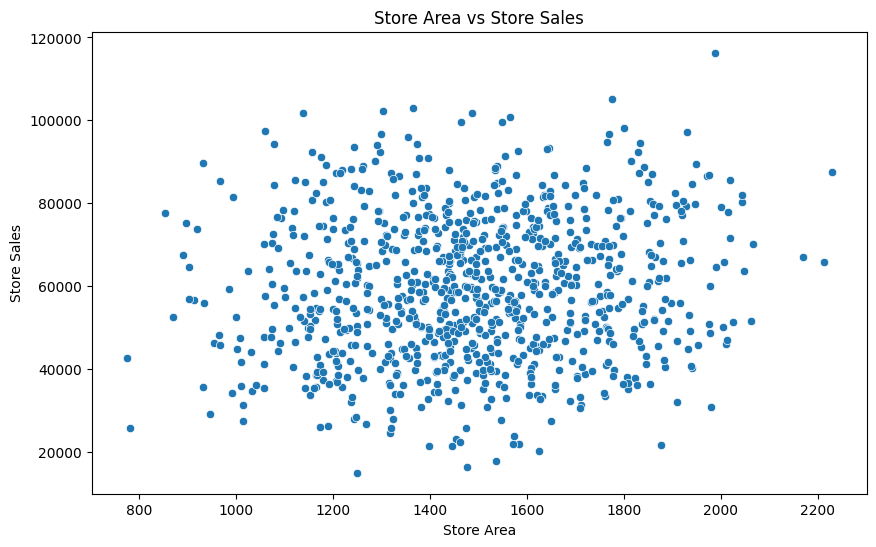

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store_Area', y='Store_Sales', data=cleaned_data)
plt.title('Store Area vs Store Sales')
plt.xlabel('Store Area')
plt.ylabel('Store Sales')
plt.show()

### 2 日常客户数量与销售额的关系

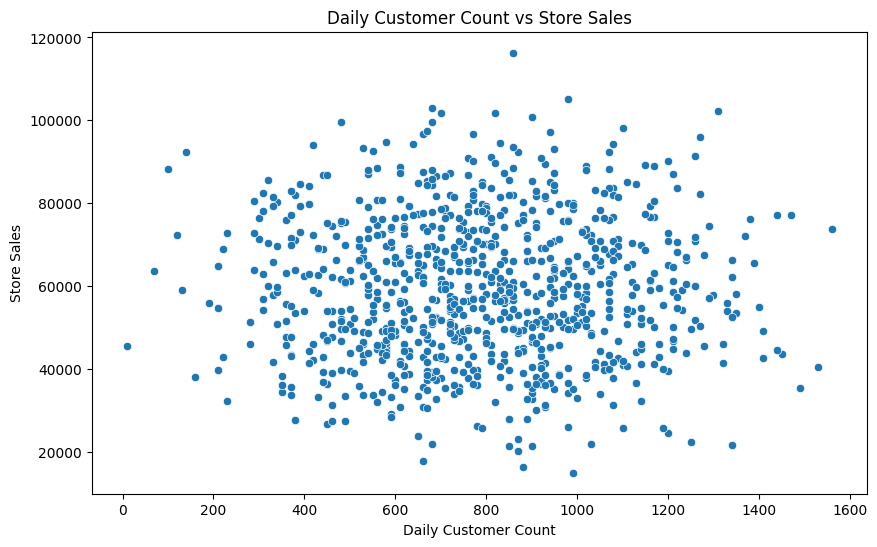

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Daily_Customer_Count', y='Store_Sales', data=cleaned_data)
plt.title('Daily Customer Count vs Store Sales')
plt.xlabel('Daily Customer Count')
plt.ylabel('Store Sales')
plt.show()

### 3 商品的数量与销售额的关系

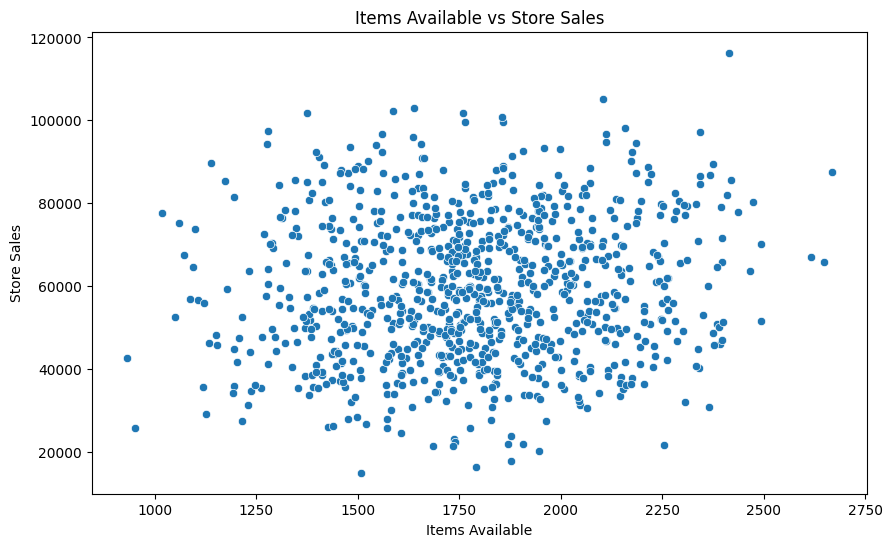

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Items_Available', y='Store_Sales', data=cleaned_data)
plt.title('Items Available vs Store Sales')
plt.xlabel('Items Available')
plt.ylabel('Store Sales')
plt.show()

### 4 相关性分析

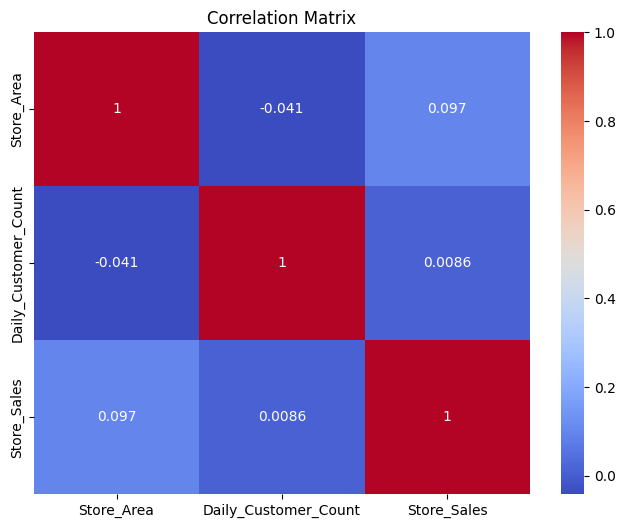

In [16]:
correlation_matrix = cleaned_data[['Store_Area', 'Daily_Customer_Count', 'Store_Sales']].corr()
# 热力图展示相关性
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 5 回归分析

In [17]:
import statsmodels.api as sm

# 设定自变量（商店面积和日常客户数量）和因变量（销售额）
X = cleaned_data[['Store_Area', 'Daily_Customer_Count']]
y = cleaned_data['Store_Sales']

# 添加常数项（截距）
X = sm.add_constant(X)

# 构建并拟合回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Store_Sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.356
Date:                Wed, 18 Sep 2024   Prob (F-statistic):             0.0131
Time:                        15:28:13   Log-Likelihood:                -10004.
No. Observations:                 896   AIC:                         2.001e+04
Df Residuals:                     893   BIC:                         2.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  4.87e+04 